In [213]:
import scipy.stats
from scipy.stats import cauchy
import matplotlib.pyplot as plt
from random import sample
import numpy as np
import math

Text(0, 0.5, 'y')

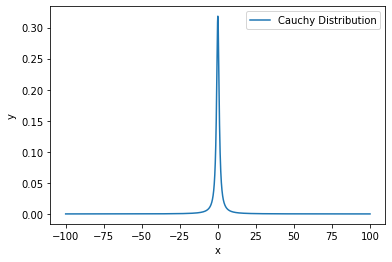

In [214]:
x = np.linspace(-100, 100, num = 5000).tolist()
y = cauchy.pdf(x).tolist()
plt.plot(x, y, label = 'Cauchy Distribution')
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')

In [217]:
B = 1000
n = 20
y_bar = []
for i in range(B):
    cauchy = np.random.standard_cauchy(size=n)
    y_bar.append(np.mean(cauchy))

Text(0, 0.5, 'y')

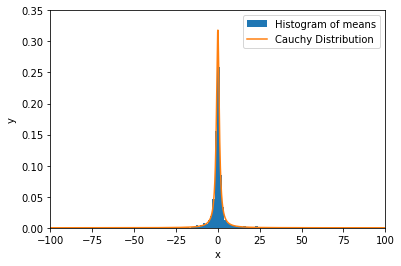

In [218]:
fig,ax = plt.subplots()
ax.axis([-100, 100, 0, 0.35])
ax.hist(y_bar, density=True, bins = 200, label='Histogram of means')
ax.plot(x, y, label = 'Cauchy Distribution')
ax.legend(loc="upper right")
ax.set_xlabel('x')
ax.set_ylabel('y')

In [219]:
random_samples = [7.52, 9.92, 9.52, 21.97, 8.39, 8.09, 9.22, 9.37, 7.33, 15.32, 1.08, 8.51, 17.73, 11.20, 8.33, 10.83, 12.40, 14.49, 9.44, 3.67]

In [220]:
def gradient_likelihood_function(theta, y):
    n = len(y)
    gradient = 0

    for i in range(n):
        gradient  = gradient + (2*(y[i] - theta))/(1 + (y[i] -theta)*(y[i] -theta))

    return gradient

def double_gradient_likelihood_function(theta, y):
    n = len(y)
    double_gradient = 0

    for i in range(n):
        double_gradient = double_gradient + 2*(-1 - 3*(y[i] -theta)*(y[i] -theta))/((1 + (y[i] -theta)*(y[i] -theta))*(1 + (y[i] -theta)*(y[i] -theta)))

    return double_gradient

In [221]:
def stepwise_gradient_ascent(y):

    theta_old = 5
    c = 0
    thetas = []
    while(c <= 10000):

        theta_temp = theta_old

        theta_old = theta_old + 0.5*(gradient_likelihood_function(theta_old, y))

        error = np.power((theta_temp - theta_old), 2)

        print("c = {}, theta = {}".format(c, theta_old))
        c += 1
        thetas.append(theta_old)
    return thetas, theta_old

In [222]:
def newton_raphson(y):
    
    theta_old = 5
    c = 0
    thetas = []
    while(c <= 10000):

        theta_old = theta_old - (gradient_likelihood_function(theta_old, y))/((double_gradient_likelihood_function(theta_old, y)))

        print("c = {}, theta = {}".format(c, theta_old))
        c += 1
        thetas.append(theta_old)
    return thetas, theta_old

In [223]:
def stochastic_gradient_ascent(y):
    
    theta_old = 5
    c = 0

    y_sample = sample(y, 12)
    thetas = []
    while(c <= 10000):

        theta_old = theta_old + 0.5*(gradient_likelihood_function(theta_old, y_sample))

        print("c = {}, theta = {}".format(c, theta_old))
        c += 1
        thetas.append(theta_old)

    return thetas, theta_old

In [224]:
newton_raphson_thetas, newton_raphson = newton_raphson(random_samples)

c = 0, theta = 5.791319951963008
c = 1, theta = 6.5879286211873715
c = 2, theta = 7.26684412741995
c = 3, theta = 7.799655379459175
c = 4, theta = 8.166238705096646
c = 5, theta = 8.424794141059541
c = 6, theta = 8.602938247920928
c = 7, theta = 8.729192376087163
c = 8, theta = 8.822845807059544
c = 9, theta = 8.894210725687566
c = 10, theta = 8.949136070965714
c = 11, theta = 8.991418521268896
c = 12, theta = 9.023828389438671
c = 13, theta = 9.048526752643404
c = 14, theta = 9.067239917786843
c = 15, theta = 9.08134635157417
c = 16, theta = 9.091935599535699
c = 17, theta = 9.09985815710849
c = 18, theta = 9.105770260585949
c = 19, theta = 9.110173368747779
c = 20, theta = 9.113447725498794
c = 21, theta = 9.11587994730995
c = 22, theta = 9.117685099648124
c = 23, theta = 9.119024008376472
c = 24, theta = 9.120016631416842
c = 25, theta = 9.120752272953649
c = 26, theta = 9.121297322052191
c = 27, theta = 9.121701080404081
c = 28, theta = 9.1220001315665
c = 29, theta = 9.12222160598

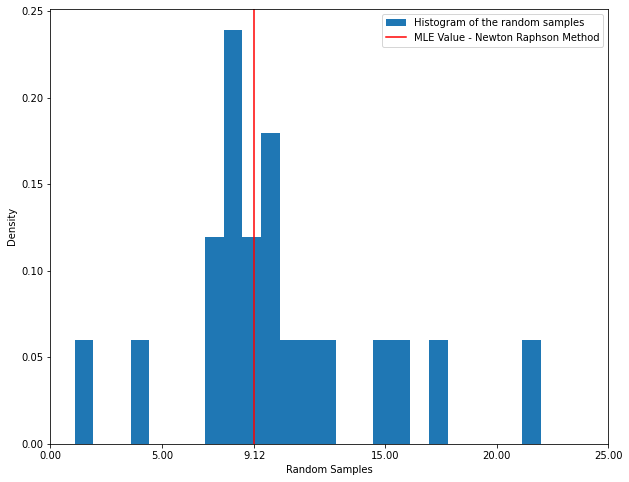

In [225]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(random_samples, bins=25, density=True, label='Histogram of the random samples')
ax.axvline(x=newton_raphson, color = 'red', label = 'MLE Value - Newton Raphson Method')
ax.legend(loc = "upper right")
ax.set_xlabel("Random Samples")
ax.set_ylabel("Density")
x_ticks = np.append(np.delete(ax.get_xticks(),2,0), newton_raphson)
ax.set_xticks(x_ticks)

In [226]:
ax.get_xticks()[2]

15.0

In [227]:
stoch_grad_thetas, stoch_grad = stochastic_gradient_ascent(random_samples)

c = 0, theta = 6.735269525253177
c = 1, theta = 9.339807067277425
c = 2, theta = 9.4623080740926
c = 3, theta = 9.471810140298993
c = 4, theta = 9.472770914899154
c = 5, theta = 9.472869808031218
c = 6, theta = 9.472880005313161
c = 7, theta = 9.472881056989891
c = 8, theta = 9.472881165454561
c = 9, theta = 9.472881176641085
c = 10, theta = 9.472881177794811
c = 11, theta = 9.4728811779138
c = 12, theta = 9.472881177926071
c = 13, theta = 9.472881177927338
c = 14, theta = 9.472881177927468
c = 15, theta = 9.472881177927482
c = 16, theta = 9.472881177927484
c = 17, theta = 9.472881177927484
c = 18, theta = 9.472881177927484
c = 19, theta = 9.472881177927484
c = 20, theta = 9.472881177927484
c = 21, theta = 9.472881177927484
c = 22, theta = 9.472881177927484
c = 23, theta = 9.472881177927484
c = 24, theta = 9.472881177927484
c = 25, theta = 9.472881177927484
c = 26, theta = 9.472881177927484
c = 27, theta = 9.472881177927484
c = 28, theta = 9.472881177927484
c = 29, theta = 9.4728811779

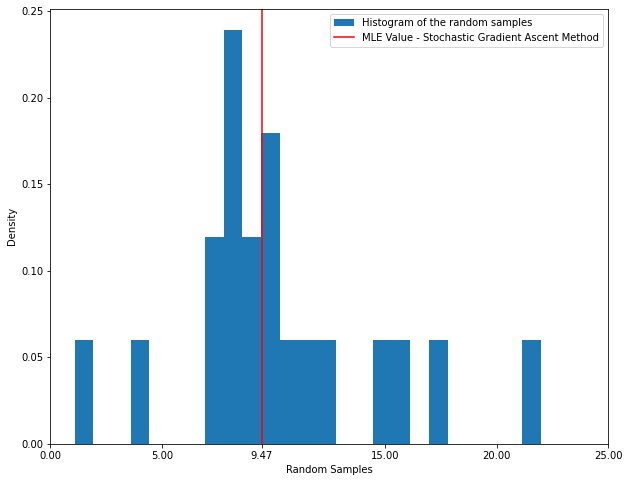

In [228]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(random_samples, bins=25, density=True, label='Histogram of the random samples')
ax.axvline(x=stoch_grad, color = 'red', label = 'MLE Value - Stochastic Gradient Ascent Method')
ax.legend(loc = "upper right")
ax.set_xlabel("Random Samples")
ax.set_ylabel("Density")
x_ticks = np.append(np.delete(ax.get_xticks(),2,0), stoch_grad)
ax.set_xticks(x_ticks)

In [229]:
step_grad_thetas, step_grad = stepwise_gradient_ascent(random_samples)

c = 0, theta = 7.944518213328531
c = 1, theta = 11.584006011484703
c = 2, theta = 8.32077794630785
c = 3, theta = 10.829404213650776
c = 4, theta = 7.776318210585482
c = 5, theta = 11.81131794205608
c = 6, theta = 8.622398247066286
c = 7, theta = 10.146437414834246
c = 8, theta = 7.3831474003579345
c = 9, theta = 12.095976779652345
c = 10, theta = 9.011798037005082
c = 11, theta = 9.365437230235266
c = 12, theta = 8.524997412191025
c = 13, theta = 10.358777986807311
c = 14, theta = 7.467119575635838
c = 15, theta = 12.064147833331212
c = 16, theta = 8.970285458295152
c = 17, theta = 9.451049885479033
c = 18, theta = 8.30649102068013
c = 19, theta = 10.862376989254903
c = 20, theta = 7.793794413640645
c = 21, theta = 11.790902932119023
c = 22, theta = 8.593937685039094
c = 23, theta = 10.207256099643887
c = 24, theta = 7.395515255598946
c = 25, theta = 12.092427198305549
c = 26, theta = 9.007204696528213
c = 27, theta = 9.375029029074952
c = 28, theta = 8.500353527673337
c = 29, theta =

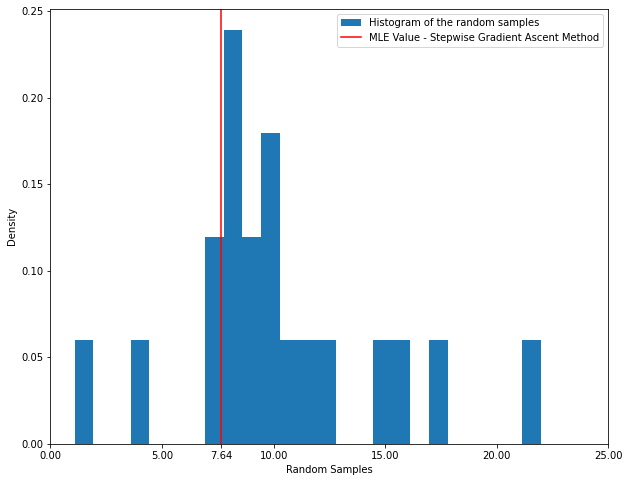

In [230]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.hist(random_samples, bins=25, density=True, label='Histogram of the random samples')
ax.axvline(x=step_grad, color = 'red', label = 'MLE Value - Stepwise Gradient Ascent Method')
ax.legend(loc = "upper right")
ax.set_xlabel("Random Samples")
ax.set_ylabel("Density")
x_ticks = np.append(ax.get_xticks(), step_grad)
ax.set_xticks(x_ticks)

In [231]:
theta_fitted = scipy.stats.cauchy.fit(random_samples, fscale = 1)

In [232]:
theta_fitted

(9.12286148071289, 1)

In [236]:
rms_error = [np.sqrt((theta_fitted[0] - newton_raphson)**2),np.sqrt((theta_fitted[0]-step_grad)**2), np.sqrt((theta_fitted[0]-stoch_grad)**2)]

In [237]:
rms_error

[8.008287553096238e-06, 1.485062212050262, 0.35001969721459325]

In [240]:
stoch_grad

9.472881177927484